In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import sys

sys.path.append(r'C:\Users\yuhan\nanospheres\src')
from utils import load_timestreams, get_psd
from get_sphere_charge import peak_func, fit_peak
from utils import load_charging_files, load_impulse_cal_files
from impulse_ana_utils import bandpass_filtered, lowpass_filtered
from plotting import plot_pulse_cal_data

In [2]:
from cycler import cycler
colors=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004']
default_cycler = cycler(color=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004'])

params = {'figure.figsize': (7, 3),
          'axes.prop_cycle': default_cycler,
          'axes.titlesize': 14,
          'legend.fontsize': 12,
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12}
plt.rcParams.update(params)

In [14]:
c_cal_square_zb = 297358191717196.44

rho = 2000 # kg/m^3
r   = 166e-9 / 2
m   = rho * (4 * np.pi / 3) * r**3

In [3]:
file = r"D:\pulse\20240719_plus_one_e_data\20240719_nopulse_3_5e-8mbar\20240719-0001\20240719-0001_1.mat"
dtt, tt, nn = load_timestreams(file, ['C', 'D', 'G'])

In [30]:
zb = nn[1] / np.sqrt(c_cal_square_zb)

fs = int(int(1 / (tt[1] - tt[0])))
bp = bandpass_filtered(zb, fs, 50000, 90000, order=8)

vzb = np.gradient(bp, dtt)

Text(0, 0.5, 'z velocity (mm/s)')

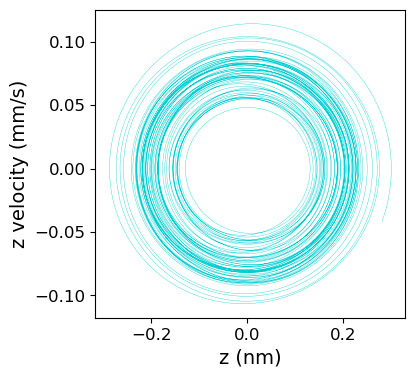

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.plot(bp[20000:40000]*1e9, vzb[20000:40000]*1000, color='darkturquoise', linewidth=0.25)

# ax.set_xlim(-1, 1)
# ax.set_ylim(-0.00025, 0.00025)
ax.set_xlabel('z (nm)')
ax.set_ylabel('z velocity (mm/s)')

In [46]:
file = r"D:\pulse\20240719_plus_one_e_data\20240719_50v_3_5e-8mbar\20240719-0002\20240719-0002_1.mat"
dtt, tt, nn = load_timestreams(file, ['D', 'G'])

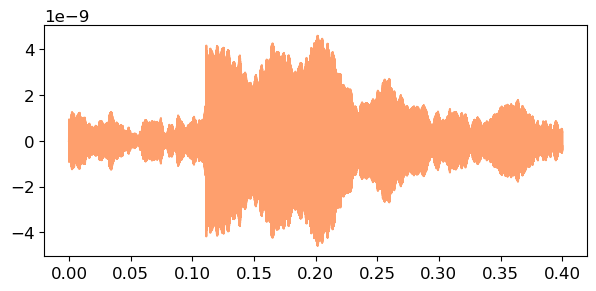

In [55]:
idx = np.logical_and(tt>0, tt<0.4)

vv = nn[1]
zb = nn[0] / np.sqrt(c_cal_square_zb)

fs = int(int(1 / (tt[1] - tt[0])))
bp = bandpass_filtered(zb, fs, 50000, 90000, order=8)
vzb = np.gradient(bp, dtt)

plt.plot(tt[idx], bp[idx])

In [61]:
tt[3000000]

0.14999999109477358

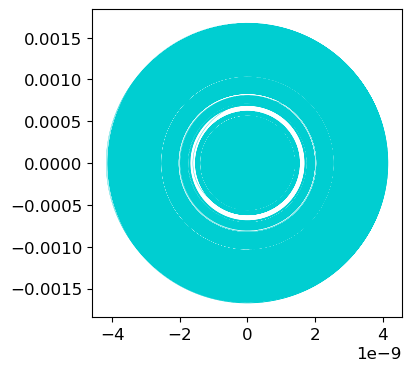

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.plot(bp[:3000000], vzb[:3000000], color='darkturquoise', linewidth=0.25)
